# Downloading and extracting dataset

In [1]:
%%capture
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip

In [2]:
%%capture
!unzip ml-100k.zip

# Dataset exploration

In [3]:
# Get dataset overall info
!cat ml-100k/u.info

943 users
1682 items
100000 ratings


In [4]:
# Print all genres
!cat ml-100k/u.genre

unknown|0
Action|1
Adventure|2
Animation|3
Children's|4
Comedy|5
Crime|6
Documentary|7
Drama|8
Fantasy|9
Film-Noir|10
Horror|11
Musical|12
Mystery|13
Romance|14
Sci-Fi|15
Thriller|16
War|17
Western|18



In [5]:
# Print all occupation types
!cat ml-100k/u.occupation

administrator
artist
doctor
educator
engineer
entertainment
executive
healthcare
homemaker
lawyer
librarian
marketing
none
other
programmer
retired
salesman
scientist
student
technician
writer


In [6]:
import pandas as pd

# Reading user dataframe
user_df = pd.read_csv(
    "ml-100k/u.user",
    sep='|', # All data is separated by '|' symbol.
    header=None,
    names=["userId", "age", "gender", "occupation", "zipCode"], # Features of user
    index_col='userId',
    encoding='ISO-8859-1') # Use ISO-8859-1 encoding, otherwise we cannot read the data

# Show user dataframe
user_df.head(5)

,age,gender,occupation,zipCode
userId,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [7]:
# Read movie file the same way as user one
movie_df = pd.read_csv(
    "ml-100k/u.item",
    sep='|',
    header=None,
    names=[
        "movieId", "title", "releaseDate", "videoReleaseDate", "IMDb URL",
        "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
        "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
        "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"],
    index_col='movieId',
    encoding='ISO-8859-1')

# Show movie dataframe
movie_df.head(5)

,title,releaseDate,videoReleaseDate,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Read ratings file the same way as user one
rates_train_df = pd.read_csv(
    "ml-100k/u1.base",
    sep='\t', # All data is separated by tabulation in u1.base file
    header=None,
    names=["userId", "movieId", "rating", "timestamp"],
    encoding='ISO-8859-1')

# Show rates dataframe
rates_train_df.head(5)

,userId,movieId,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [9]:
# Read ratings file the same way as user one
rates_test_df = pd.read_csv(
    "ml-100k/u1.test",
    sep='\t', # All data is separated by tabulation in u1.base file
    header=None,
    names=["userId", "movieId", "rating", "timestamp"],
    encoding='ISO-8859-1')

# Show rates dataframe
rates_test_df.head(5)

,userId,movieId,rating,timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


In [10]:
unique_train_users = set(rates_train_df["userId"].unique().tolist())
unique_test_users = set(rates_test_df["userId"].unique().tolist())

common_users = unique_train_users.intersection(unique_test_users)

print(f"Count of unique users in train data: {len(unique_train_users)}")
print(f"Count of unique users in test data: {len(unique_test_users)}")
print(f"Common users count from test and train sets: {len(common_users)}")

Count of unique users in train data: 943
Count of unique users in test data: 459
Common users count from test and train sets: 459


In [11]:
unique_train_movies = set(rates_train_df["movieId"].unique().tolist())
unique_test_movies = set(rates_test_df["movieId"].unique().tolist())

common_movies = unique_train_movies.intersection(unique_test_movies)

print(f"Count of unique movies in train data: {len(unique_train_movies)}")
print(f"Count of unique movies in test data: {len(unique_test_movies)}")
print(f"Common movies count from test and train sets: {len(common_movies)}")

Count of unique movies in train data: 1650
Count of unique movies in test data: 1410
Common movies count from test and train sets: 1378


In [12]:
# Let's get all movies rated by user "15" in train set
user_id = 15

rated_movies = rates_train_df[rates_train_df["userId"] == user_id]
rated_movies

,userId,movieId,rating,timestamp
1311,15,13,1,879455940
1312,15,14,4,879455659
1313,15,15,4,879455939
1314,15,50,5,879455606
1315,15,111,4,879455914
1316,15,118,1,879456381
1317,15,121,3,879456168
1318,15,125,5,879456049
1319,15,181,5,879455710
1320,15,220,4,879456262


In [13]:
# Let's do the same for test set

rated_movies = rates_test_df[rates_test_df["userId"] == user_id]
rated_movies

,userId,movieId,rating,timestamp
1121,15,1,1,879455635
1122,15,7,1,879455506
1123,15,9,4,879455635
1124,15,18,1,879455681
1125,15,20,3,879455541
1126,15,25,3,879456204
1127,15,127,2,879455505
1128,15,137,4,879455939
1129,15,148,3,879456049
1130,15,222,3,879455730


## <font color="lime">Note</font>
* As we can see there are 943 users, 1682 movies and 100000 ratings.

* Users have occupation feature. This feature has **21** possible values.

* Movies have genre feature. This feature has **19** possible values.

* Test and train sets have the same users, but not always same movies. Moreover the ratings of users in test set are completly disjoint from train set.

# Get top-15 the most liked movies

In [14]:
moviesRatings = dict()

rates_full_df = pd.read_csv(
    "ml-100k/u.data",
    sep='\t', # All data is separated by tabulation in u1.base file
    header=None,
    names=["userId", "movieId", "rating", "timestamp"],
    encoding='ISO-8859-1')

for i, row in rates_full_df.iterrows():
    if not row["movieId"] in moviesRatings:
        moviesRatings[row["movieId"]] = [row["rating"]]
    else:
        moviesRatings[row["movieId"]] += [row["rating"]]

movieMeanRating = []
for movie in moviesRatings:
    movieMeanRating.append((movie, sum(moviesRatings[movie])/len(moviesRatings[movie])))

movieMeanRating.sort(key=lambda x: -x[1])

for i in range(0, 15):
    movie, rating = movieMeanRating[i]
    name = movie_df.loc[[movie]]["title"].tolist()[0]
    print(f"MovieID: {movie}, MovieName: {name}, Mean Rating: {rating}")

MovieID: 1189, MovieName: Prefontaine (1997), Mean Rating: 5.0
MovieID: 1500, MovieName: Santa with Muscles (1996), Mean Rating: 5.0
MovieID: 814, MovieName: Great Day in Harlem, A (1994), Mean Rating: 5.0
MovieID: 1536, MovieName: Aiqing wansui (1994), Mean Rating: 5.0
MovieID: 1293, MovieName: Star Kid (1997), Mean Rating: 5.0
MovieID: 1599, MovieName: Someone Else's America (1995), Mean Rating: 5.0
MovieID: 1653, MovieName: Entertaining Angels: The Dorothy Day Story (1996), Mean Rating: 5.0
MovieID: 1467, MovieName: Saint of Fort Washington, The (1993), Mean Rating: 5.0
MovieID: 1122, MovieName: They Made Me a Criminal (1939), Mean Rating: 5.0
MovieID: 1201, MovieName: Marlene Dietrich: Shadow and Light (1996) , Mean Rating: 5.0
MovieID: 1449, MovieName: Pather Panchali (1955), Mean Rating: 4.625
MovieID: 119, MovieName: Maya Lin: A Strong Clear Vision (1994), Mean Rating: 4.5
MovieID: 1398, MovieName: Anna (1996), Mean Rating: 4.5
MovieID: 1642, MovieName: Some Mother's Son (1996),

# Get top-15 the most popular movies

In [15]:
movieViews = []
for movie in moviesRatings:
    movieViews.append((movie, len(moviesRatings[movie])))

movieViews.sort(key=lambda x: -x[1])

for i in range(0, 15):
    movie, views = movieViews[i]
    name = movie_df.loc[[movie]]["title"].tolist()[0]
    print(f"MovieID: {movie}, MovieName: {name}, Views: {views}")

MovieID: 50, MovieName: Star Wars (1977), Views: 583
MovieID: 258, MovieName: Contact (1997), Views: 509
MovieID: 100, MovieName: Fargo (1996), Views: 508
MovieID: 181, MovieName: Return of the Jedi (1983), Views: 507
MovieID: 294, MovieName: Liar Liar (1997), Views: 485
MovieID: 286, MovieName: English Patient, The (1996), Views: 481
MovieID: 288, MovieName: Scream (1996), Views: 478
MovieID: 1, MovieName: Toy Story (1995), Views: 452
MovieID: 300, MovieName: Air Force One (1997), Views: 431
MovieID: 121, MovieName: Independence Day (ID4) (1996), Views: 429
MovieID: 174, MovieName: Raiders of the Lost Ark (1981), Views: 420
MovieID: 127, MovieName: Godfather, The (1972), Views: 413
MovieID: 56, MovieName: Pulp Fiction (1994), Views: 394
MovieID: 7, MovieName: Twelve Monkeys (1995), Views: 392
MovieID: 98, MovieName: Silence of the Lambs, The (1991), Views: 390


# Users age plot

MAX AGE: 73
MIN AGE: 7


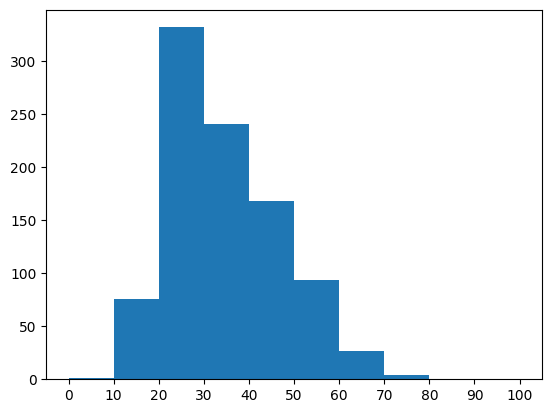

In [16]:
import matplotlib.pyplot as plt

ages = [row["age"] for _, row in user_df.iterrows()]
print(f"MAX AGE: {max(ages)}")
print(f"MIN AGE: {min(ages)}")
plt.hist(ages, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

# Users gender fraction

Females:273
Males:670


<Axes: >

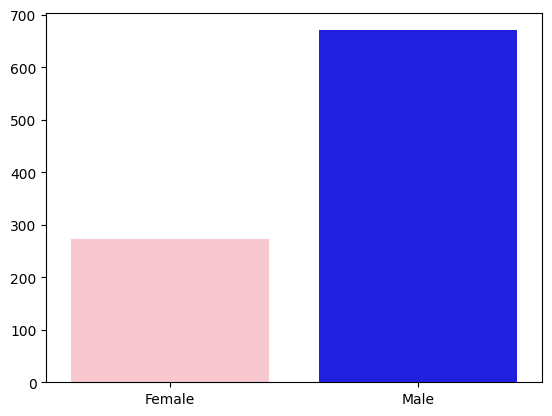

In [17]:
import seaborn as sns

genders = [row["gender"] for _, row in user_df.iterrows()]

print(f"Females:{genders.count('F')}")
print(f"Males:{genders.count('M')}")

sns.barplot(x=["Female", "Male"], y=[genders.count('F'), genders.count('M')], palette=["pink", "blue"])

# Movie's genres

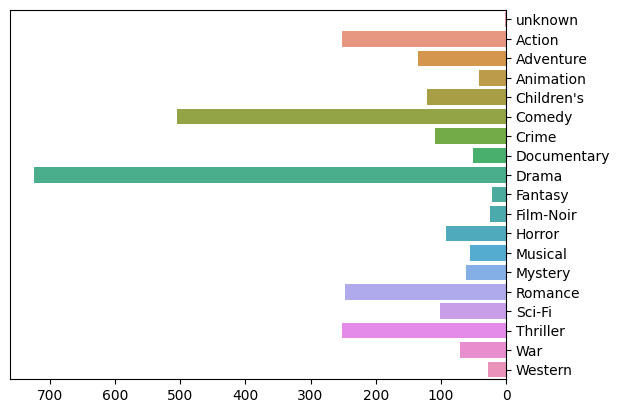

In [20]:
genres = [0]*19
for _, row in movie_df.iterrows():
    for i, genre in enumerate(row[4:]):
        genres[i] += genre


ax = sns.barplot(y=movie_df.columns[4:].tolist(), x=genres, orient='h')
ax.invert_xaxis()
ax.yaxis.tick_right()
plt.show()

# The most popular rating value

<Axes: >

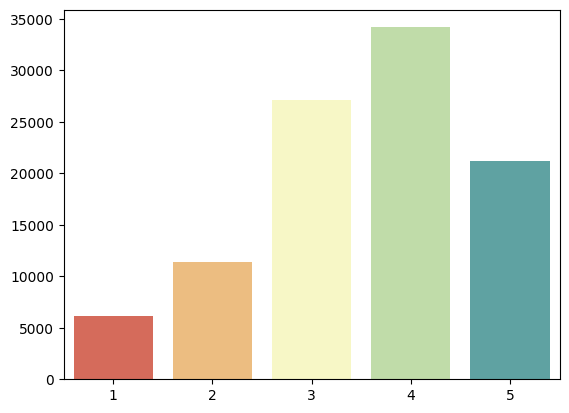

In [26]:
ratings = [row["rating"] for _, row in rates_full_df.iterrows()]

possible_ratings = [1,2,3,4,5]
sns.barplot(x=possible_ratings, y=[ratings.count(rating) for rating in possible_ratings], palette="Spectral")

## <font color="lime">Note</font>
* The most popular rate value is 4.

* The most popular movie genre is Drama.

* Majority of users are males

* Majority of users have age between 20 and 30

* The most viewed film is StarWars (1977)

# <font color="yellow"> Ideas for preprocessing </font>
1. Encode "occupation", "gender", "age" and "genre" features using one hot encoder.
2. Remove "zipCode" feature from users.
3. Remove all features from movies, except encoded "genre".